# Explore here

It's recommended to use this notebook for exploration purposes.

In [28]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
url = "https://companies-market-cap-copy.vercel.app/index.html"

# Request download from the internet

response = requests.get(url)

if response.status_code != 200:
    print(f"Download Error")
text = response.text
response.status_code



200

In [3]:

soup = BeautifulSoup(text,"html.parser") 



In [4]:
# Find the tables
# Find table bodies
table_body = soup.find('tbody') 

print(table_body)

<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="percentage-green">73.01%</td></tr><tr><td><span class="year">2015</span></td><td>$4

In [5]:
# Find table entries

table_entries = soup.find_all("tr")
table_entries

[<tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>,
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr>,
 <tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr>,
 <tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr>,
 <tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr>,
 <tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr>,
 <tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr>,
 <tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>,
 <tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr>,
 <tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="pe

## Value Scraping ##
Now that we have successfully acquired the data in text format, is time to extract the relevant values and put them in a Dataframe for easy manipulation and visualization. When it comes to how html is structured recall the following:
1. tr -  table row.
2. th - table header.
3. td - table data.
4. class -unique identifiers.

The data is organized in rows, we have to keep that in mind when extracting it from the text. We do this in python with succcessive for loops into the text with the aid of Beautiful soup to parse.

In [6]:
# First get the headers

header = []
for h in table_entries[:3]: # I just need the first three elements
    for x in h.find_all('th'):
        header.append(x.text)
header

# Next get the values

values = []

for v in table_entries:

    value = [value.text.strip() for value in v.find_all("td")]
    values.append(value)

values


[[],
 ['2024', '$97.15 B', '0.39%'],
 ['2023', '$96.77 B', '18.8%'],
 ['2022', '$81.46 B', '51.35%'],
 ['2021', '$53.82 B', '70.67%'],
 ['2020', '$31.53 B', '28.31%'],
 ['2019', '$24.57 B', '14.52%'],
 ['2018', '$21.46 B', '82.51%'],
 ['2017', '$11.75 B', '67.98%'],
 ['2016', '$7.00 B', '73.01%'],
 ['2015', '$4.04 B', '26.5%'],
 ['2014', '$3.19 B', '58.85%'],
 ['2013', '$2.01 B', '387.23%'],
 ['2012', '$0.41 B', '102.34%'],
 ['2011', '$0.20 B', '74.95%'],
 ['2010', '$0.11 B', '4.29%'],
 ['2009', '$0.11 B', ''],
 [],
 ['AppleAAPL'],
 ['RivianRIVN'],
 ['Lucid MotorsLCID'],
 ['NIONIO', '$8.85 B', '-90.88%', 'China']]

In [7]:
# List of entries, We only care about the table values in regards to Revue and Change

l_entries = [l for l in values if len(l) ==3]
l_entries

[['2024', '$97.15 B', '0.39%'],
 ['2023', '$96.77 B', '18.8%'],
 ['2022', '$81.46 B', '51.35%'],
 ['2021', '$53.82 B', '70.67%'],
 ['2020', '$31.53 B', '28.31%'],
 ['2019', '$24.57 B', '14.52%'],
 ['2018', '$21.46 B', '82.51%'],
 ['2017', '$11.75 B', '67.98%'],
 ['2016', '$7.00 B', '73.01%'],
 ['2015', '$4.04 B', '26.5%'],
 ['2014', '$3.19 B', '58.85%'],
 ['2013', '$2.01 B', '387.23%'],
 ['2012', '$0.41 B', '102.34%'],
 ['2011', '$0.20 B', '74.95%'],
 ['2010', '$0.11 B', '4.29%'],
 ['2009', '$0.11 B', '']]

In [8]:
# Create the dataframe

df_tesla = pd.DataFrame(l_entries,columns=header)
df_tesla

,Year,Revenue,Change
0,2024,$97.15 B,0.39%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%
5,2019,$24.57 B,14.52%
6,2018,$21.46 B,82.51%
7,2017,$11.75 B,67.98%
8,2016,$7.00 B,73.01%
9,2015,$4.04 B,26.5%


## Clean DataFrame ##
Now that we have everything in a dataframe we have to clean the daframe by removing non-numeric characters as well as drop any enpty entries. In this case we have tho remove the '**$**' and '**B**' from the **Revenue** and **Change** columns and drop the last row.

In [9]:
import regex as re

pattern = r"[^a-zA-Z0-9\.]|b|B"

df_tesla['Revenue'] = df_tesla['Revenue'].str.replace(pattern,'',regex=True)
df_tesla.set_index(pd.Index(range(1,17)),inplace=True)

df_tesla = df_tesla.rename(columns={"Revenue":"Revenue (Billions)"})
df_tesla


,Year,Revenue (Billions),Change
1,2024,97.15,0.39%
2,2023,96.77,18.8%
3,2022,81.46,51.35%
4,2021,53.82,70.67%
5,2020,31.53,28.31%
6,2019,24.57,14.52%
7,2018,21.46,82.51%
8,2017,11.75,67.98%
9,2016,7.00,73.01%
10,2015,4.04,26.5%


In [10]:
# Drop empty entries
df_tesla = df_tesla.drop(16)
df_tesla


,Year,Revenue (Billions),Change
1,2024,97.15,0.39%
2,2023,96.77,18.8%
3,2022,81.46,51.35%
4,2021,53.82,70.67%
5,2020,31.53,28.31%
6,2019,24.57,14.52%
7,2018,21.46,82.51%
8,2017,11.75,67.98%
9,2016,7.00,73.01%
10,2015,4.04,26.5%


## Store the data in Sqlite ## 
Store the dataframe in a database.

In [13]:
# Create an instance of the database
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

In [14]:
# Create the table in Sqlite

cursor.execute('''
               CREATE TABLE tesla (
               id INTEGER PRIMARY KEY,
               year INTEGER,
               revenue VARCHAR(10),
               change VARCHAR(10)
               );'''
               )



OperationalError: table tesla already exists

In [17]:
for index, row in df_tesla.iterrows():
    cursor.execute("INSERT INTO tesla (id, year,revenue,change) VALUES (?, ?, ?, ?)", (index, row["Year"],row["Revenue (Billions)"],row["Change"]))

conn.commit()
conn.close()

## Visualize the Data ##
Before We visulize, we need to convert the string entries into numneric entries.

In [24]:
df_tesla["Year"] = pd.to_numeric(df_tesla["Year"])
df_tesla["Revenue (Billions)"] = pd.to_numeric(df_tesla["Revenue (Billions)"])

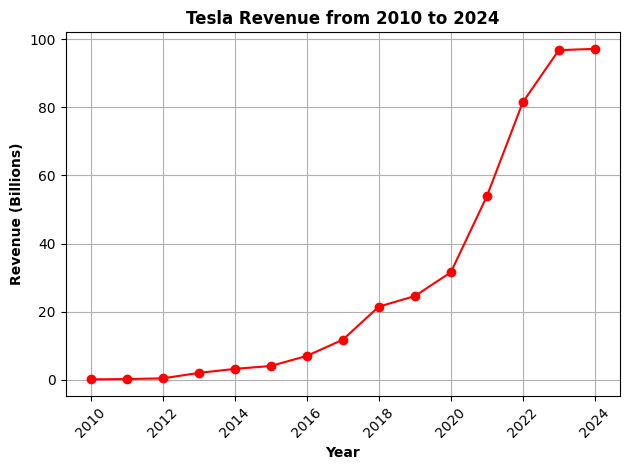

In [33]:
plt.plot(df_tesla["Year"],df_tesla["Revenue (Billions)"],marker='o',label='Revenue (Billions)',color='red')

plt.xlabel("Year",fontweight='bold')
plt.ylabel("Revenue (Billions)",fontweight='bold')
plt.title("Tesla Revenue from 2010 to 2024",fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


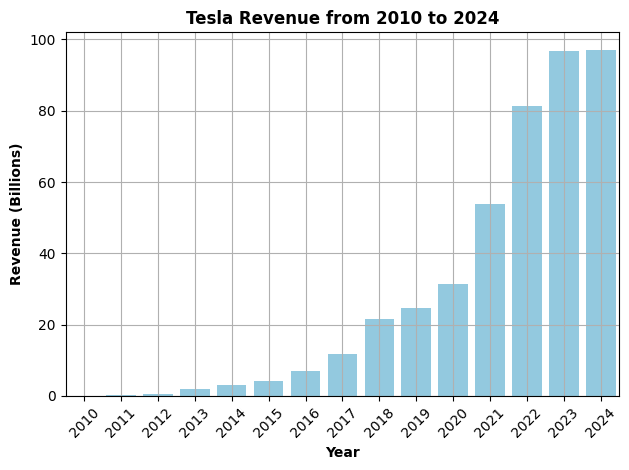

In [32]:
sns.barplot(df_tesla,x = "Year",y = "Revenue (Billions)",color='skyblue')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Revenue (Billions)",fontweight='bold')
plt.title("Tesla Revenue from 2010 to 2024",fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

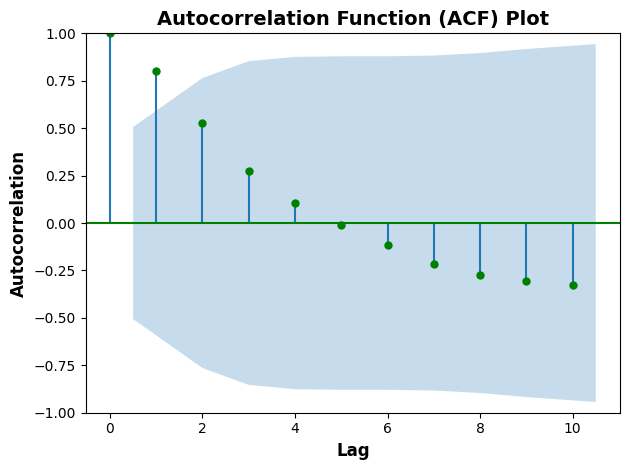

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df_tesla['Revenue (Billions)'], lags=10,color = 'green') 
plt.xlabel('Lag',fontweight='bold',fontsize=12)
plt.ylabel('Autocorrelation',fontweight='bold',fontsize = 12)
plt.title('Autocorrelation Function (ACF) Plot',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()
